<a href="https://colab.research.google.com/github/v3xlrm1nOwo1/Google-Play-Sentiment-Analysis-With-BERT/blob/main/01_Create_Dataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Create Dataset from Google Play**

In [ ]:
!pip install -qq google-play-scraper

In [ ]:
import json
import pandas as pd
from tqdm import tqdm

import matplotlib.pyplot as plt
import seaborn as sns
from skimage import io

from pygments import highlight
from pygments.lexers import JsonLexer
from pygments.formatters import TerminalFormatter

from google_play_scraper import app, Sort, reviews

%matplotlib inline
%config InlineBackend.figure_format='retina'

sns.set(style='whitegrid', palette='muted', font_scale=1.2)

#### Apps List

In [ ]:
app_packages = [
    'com.anydo',
    'com.todoist',
    'com.ticktick.task',
    'com.habitrpg.android.habitica',
    'cc.forestapp',
    'com.oristats.habitbull',
    'com.levor.liferpgtasks',
    'com.habitnow',
    'com.microsoft.todos',
    'prox.lab.calclock',
    'com.gmail.jmartindev.timetune',
    'com.tasks.android',
    'com.artfulagenda.app',
    'com.appgenix.bizcal',
    'com.appxy.planner',
    'com.letterboxd.letterboxd',
    'org.brilliant.android',
    'com.microsoft.math',
    'com.vistring.blink.android',
    'art.pixai.pixai',
    'org.readera',
    'org.readera.premium',
    'com.obreey.reader',
    'com.mindtwisted.kanjistudy',
    'com.PixelStudio',
    'cn.danatech.xingseus',
    'alldocumentreader.office.viewer.filereader',
    'com.intsig.camscanner',
    'cn.wps.moffice_eng',
    'com.brave.browser',
    'com.duocards.app',
    'com.elasthink.lyricstraining',
    'org.wikipedia',
    ]

len(app_packages)

33

#### Get App Informations

In [ ]:
def get_app_infos(apps_list):
    app_infos = []
    for app_id in tqdm(apps_list):
        app_info = app(app_id=app_id, lang='en', country='us')
        del app_info['comments']
        app_infos.append(app_info)

    return app_infos

In [ ]:
app_infos = get_app_infos(apps_list=app_packages)

100%|██████████| 33/33 [00:08<00:00,  3.98it/s]


In [ ]:
def print_json(json_object):
    json_str = json.dumps(
        json_object,
        indent=2,
        sort_keys=True,
        default=str
    )

    print(highlight(json_str, JsonLexer(), TerminalFormatter()))

In [ ]:
print_json(app_infos[0])

{
  "adSupported": false,
  "appId": "com.anydo",
  "categories": [
    {
      "id": "PRODUCTIVITY",
      "name": "Productivity"
    }
  ],
  "containsAds": false,
  "contentRating": "Everyone",
  "contentRatingDescription": null,
  "currency": "USD",
  "description": "\ud83e\udd47 <b>\"#1 to do list app out there\u201d</b> - WSJ\r\n\ud83c\udfc6 <b>Editor's Choice</b> by Google\r\n\r\nOver 30M people rely on Any.do to stay organized and get more done.\r\nIt's a simple to do list app with reminders, planner & calendar - all in one.\r\n\r\n<b>\ud83e\udd47 \"A MUST HAVE APP\" (Lifehacker, NYTimes, USA TODAY).</b>\r\n\r\nAny.do is a free to-do list, planner & calendar app for managing and organizing your daily tasks, to-do lists, notes, reminders, checklists, calendar events, grocery lists, and more.\r\n\r\nOrganize your tasks & to-do list\r\n\r\n\u2022 ADVANCED CALENDAR & DAILY PLANNER - Keep your to-do list and calendar events always at hand with our calendar widget. Any.do to-do list 

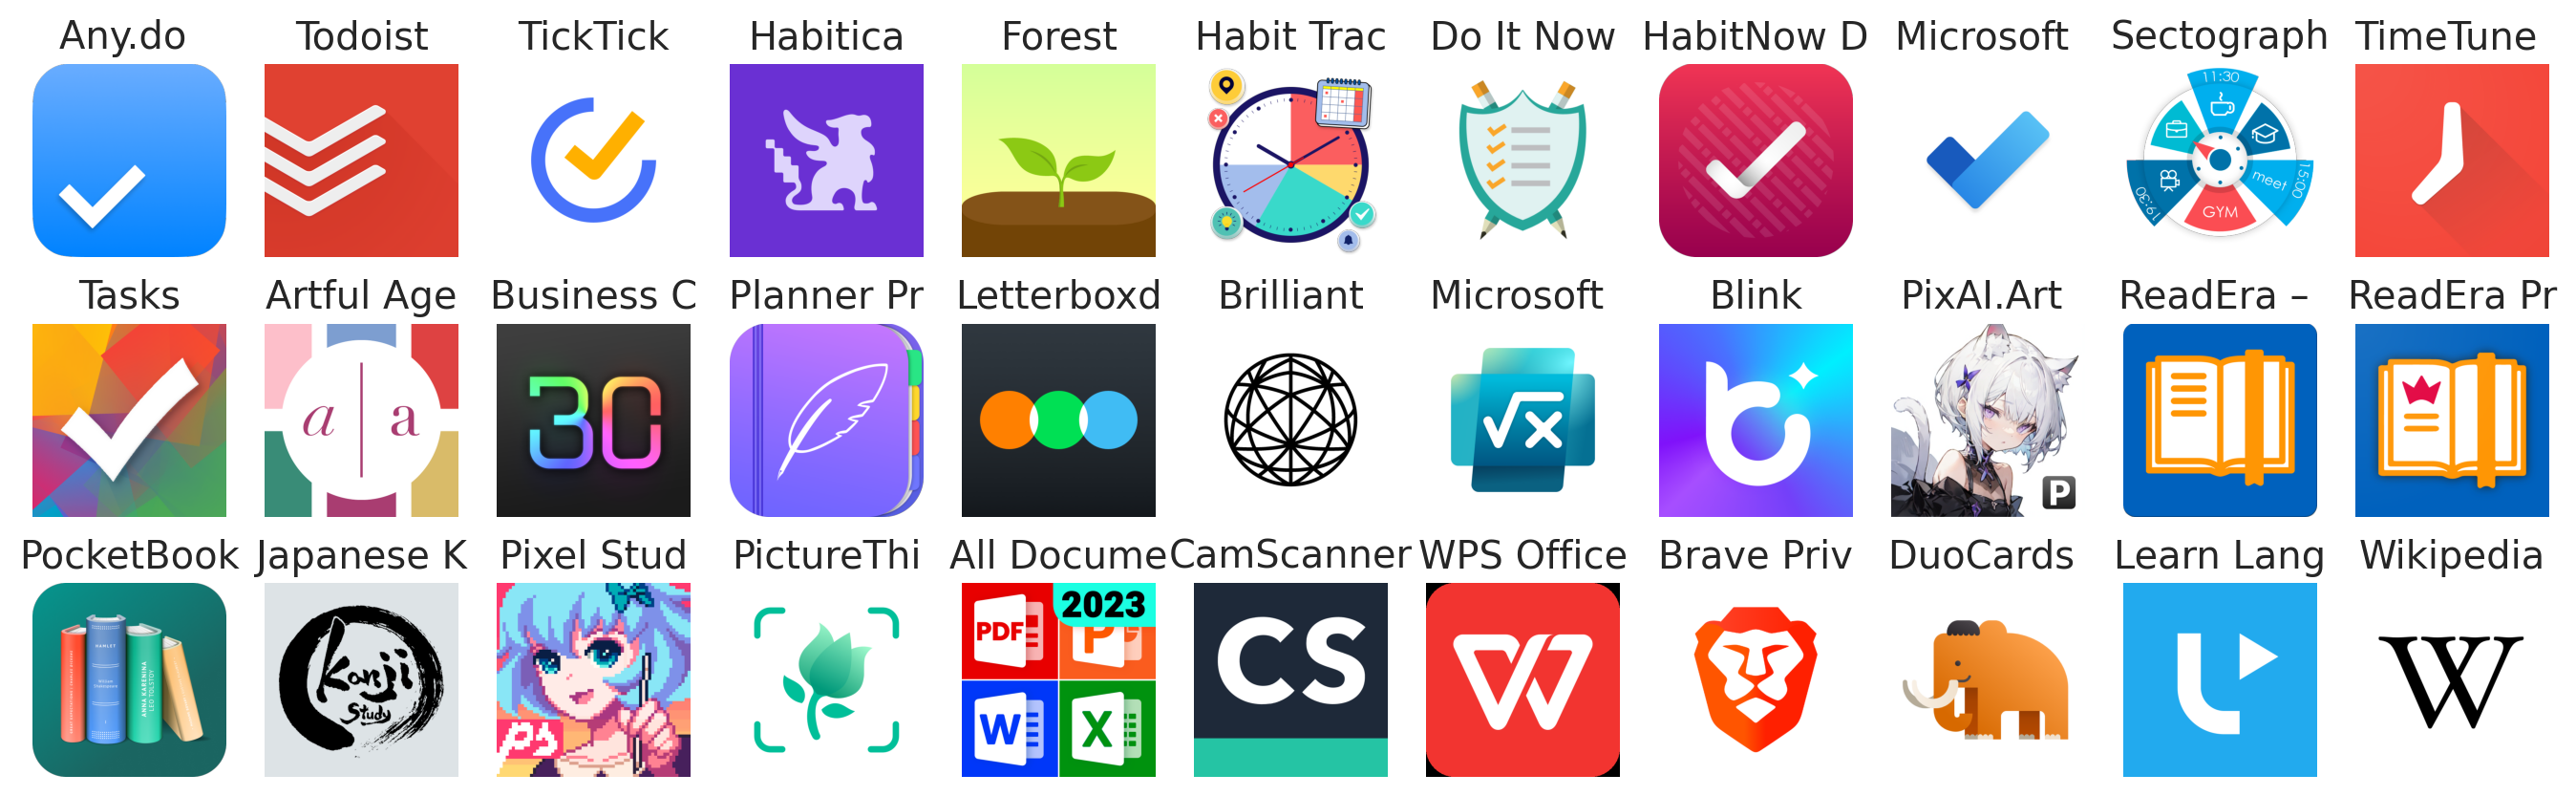

In [ ]:
def format_title(title):
    sep_index = title.find(':') if title.find(':') != -1 else title.find('-')
    if sep_index != -1:
        title = title[:sep_index]
    return title[: 10]

fig, axs = plt.subplots(3, 11, figsize=(17, 5))

for i, ax in enumerate(axs.flat):
    ai = app_infos[i]
    img = io.imread(ai['icon'])
    # img = plt.imread(f)
    ax.imshow(img)
    ax.set_title(format_title(ai['title']))
    ax.axis('off')

In [ ]:
app_infos_df = pd.DataFrame(app_infos)
app_infos_df.head(2)

,title,description,descriptionHTML,summary,installs,minInstalls,realInstalls,score,ratings,reviews,...,videoImage,contentRating,contentRatingDescription,adSupported,containsAds,released,updated,version,appId,url
0,Any.do - To do list & Calendar,"🥇 <b>""#1 to do list app out there”</b> - WSJ\r...",🥇 <b>&quot;#1 to do list app out there”</b> - ...,"Simple planner with to-do list, tasks, reminde...","10,000,000+",10000000,29518058,4.402365,471802,36013,...,None,Everyone,None,False,False,"Nov 10, 2011",1691597562,5.17.0.135,com.anydo,https://play.google.com/store/apps/details?id=...
1,Todoist: to-do list & planner,Trusted by 30+ million people and teams worldw...,Trusted by 30+ million people and teams worldw...,Simple yet powerful to-do list. Habit planner ...,"10,000,000+",10000000,38405816,4.434062,256061,15867,...,None,Everyone,None,False,False,"Nov 18, 2012",1692793754,None,com.todoist,https://play.google.com/store/apps/details?id=...


In [ ]:
app_infos_df.to_csv('apps.csv', index=None, header=True)

#### Get The Apps Reviews

In [ ]:
def get_app_reviews(apps_list):
    app_reviews = []

    for app_id in tqdm(apps_list):
        for score in range(1, 6):
            for sort_order in [Sort.MOST_RELEVANT, Sort.NEWEST]:
                rvs, _ = reviews(
                    app_id=app_id,
                    lang='en',
                    country='us',
                    sort=sort_order,
                    count=200 if score == 3 else 100,
                    filter_score_with=score
                )

                for rv in rvs:
                    rv['sortOrder'] = 'most_relevant' if sort_order == Sort.MOST_RELEVANT else 'newest'
                    rv['appId'] = app_id
                app_reviews.extend(rvs)

    return app_reviews

In [ ]:
app_reviews = get_app_reviews(app_packages)

100%|██████████| 33/33 [01:38<00:00,  2.99s/it]


In [ ]:
print_json(app_reviews[0])

{
  "appId": "com.anydo",
  "appVersion": "5.17.0.119",
  "at": "2023-07-02 17:35:08",
  "content": "I used to love this app, but recently they did a big push for premium. At the same time, I started having a huge issue with my lists not opening. The screen shows, but it is grayed out and I can't click on anything. I tried the premium to see if that would help, but it hasn't. My lists are inaccessible to me. I have tried uninstalling and reinstalling the app to noavail.",
  "repliedAt": "2023-07-03 09:28:29",
  "replyContent": "You should only see the upgrade ad when you first log into your accout or when you are trying to use premium features. You can always dismiss it, though! As for the lists issue - please contact us at https://www.any.do/contact_form or via Settings \u2192 Support and we will get that sorted for you! \ud83d\ude0a",
  "reviewCreatedVersion": "5.17.0.119",
  "reviewId": "eecc1d6f-2e1b-4d5c-bf06-e2ce6718c410",
  "score": 1,
  "sortOrder": "most_relevant",
  "thumbsUp

In [ ]:
app_reviews_df = pd.DataFrame(app_reviews)
app_reviews_df.head(n=2)

,reviewId,userName,userImage,content,score,thumbsUpCount,reviewCreatedVersion,at,replyContent,repliedAt,appVersion,sortOrder,appId
0,eecc1d6f-2e1b-4d5c-bf06-e2ce6718c410,Krista Clark,https://play-lh.googleusercontent.com/a/AAcHTt...,"I used to love this app, but recently they did...",1,137,5.17.0.119,2023-07-02 17:35:08,You should only see the upgrade ad when you fi...,2023-07-03 09:28:29,5.17.0.119,most_relevant,com.anydo
1,a6b21375-312e-41b5-90ab-3d56273ca01b,A Google user,https://play-lh.googleusercontent.com/EGemoI2N...,This app was great until the latest update and...,1,38,4.12.0.5,2019-01-12 13:20:28,"We are sorry you feel this way, please note th...",2019-01-27 15:44:37,4.12.0.5,most_relevant,com.anydo


In [ ]:
app_reviews_df.to_csv('reviews.csv', index=None, header=True)